### External_data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

In [2]:
%matplotlib inline
sns.set_theme()  # Apply the default theme of seaborn
plt.rcParams["figure.figsize"] = (10, 4)  # Set the figure size for all plots

In [3]:
%pip install -U ydata_profiling # -U is to accept by default the questions of the terminal
import ydata_profiling

Note: you may need to restart the kernel to use updated packages.


In [4]:
external_data = pd.read_csv("data/external_data.csv")

In [5]:
external_data.columns

Index(['numer_sta', 'date', 'pmer', 'tend', 'cod_tend', 'dd', 'ff', 't', 'td',
       'u', 'vv', 'ww', 'w1', 'w2', 'n', 'nbas', 'hbas', 'cl', 'cm', 'ch',
       'pres', 'niv_bar', 'geop', 'tend24', 'tn12', 'tn24', 'tx12', 'tx24',
       'tminsol', 'sw', 'tw', 'raf10', 'rafper', 'per', 'etat_sol', 'ht_neige',
       'ssfrai', 'perssfrai', 'rr1', 'rr3', 'rr6', 'rr12', 'rr24', 'phenspe1',
       'phenspe2', 'phenspe3', 'phenspe4', 'nnuage1', 'ctype1', 'hnuage1',
       'nnuage2', 'ctype2', 'hnuage2', 'nnuage3', 'ctype3', 'hnuage3',
       'nnuage4', 'ctype4', 'hnuage4'],
      dtype='object')

In [6]:
external_data.dtypes

numer_sta      int64
date          object
pmer           int64
tend           int64
cod_tend       int64
dd             int64
ff           float64
t            float64
td           float64
u              int64
vv             int64
ww             int64
w1           float64
w2           float64
n            float64
nbas         float64
hbas         float64
cl           float64
cm           float64
ch           float64
pres           int64
niv_bar      float64
geop         float64
tend24       float64
tn12         float64
tn24         float64
tx12         float64
tx24         float64
tminsol      float64
sw           float64
tw           float64
raf10        float64
rafper       float64
per            int64
etat_sol     float64
ht_neige     float64
ssfrai       float64
perssfrai    float64
rr1          float64
rr3          float64
rr6          float64
rr12         float64
rr24         float64
phenspe1     float64
phenspe2     float64
phenspe3     float64
phenspe4     float64
nnuage1      

In [7]:
external_data.head()

,numer_sta,date,pmer,tend,cod_tend,dd,ff,t,td,u,...,hnuage1,nnuage2,ctype2,hnuage2,nnuage3,ctype3,hnuage3,nnuage4,ctype4,hnuage4
0,7149,2021-01-01 00:00:00,100810,80,1,270,1.8,272.75,272.15,96,...,600.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,7149,2021-01-01 03:00:00,100920,110,3,300,1.7,271.25,270.95,98,...,1500.0,2.0,3.0,3000.0,NaN,NaN,NaN,NaN,NaN,NaN
2,7149,2021-01-01 06:00:00,100950,30,3,290,2.6,271.95,271.65,98,...,480.0,4.0,6.0,2000.0,6.0,3.0,3000.0,NaN,NaN,NaN
3,7149,2021-01-01 09:00:00,101100,150,2,280,1.7,272.45,272.05,97,...,1740.0,3.0,3.0,2800.0,NaN,NaN,NaN,NaN,NaN,NaN
4,7149,2021-01-01 12:00:00,101110,30,0,50,1.0,276.95,274.15,82,...,330.0,4.0,6.0,570.0,7.0,6.0,810.0,NaN,NaN,NaN


In [10]:
profile = external_data.profile_report()
profile.to_file("EDA_external_data_report.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

/opt/anaconda3/envs/bikes-count/lib/python3.10/site-packages/pandas/core/nanops.py:1632: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  return spearmanr(a, b)[0]
/opt/anaconda3/envs/bikes-count/lib/python3.10/site-packages/pandas/core/nanops.py:1632: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  return spearmanr(a, b)[0]


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

## Select features for analysis:

In [23]:
threshold = 0.5
bool_drop = external_data.isna().mean() >= threshold

dropped_feat_ext = external_data.columns[bool_drop]
selected_feat_ext = external_data.columns[~bool_drop]

In [33]:
selected_weather_features = [
    "ff",  #: "Vitesse_du_vent_moyen_10mn",
    "t",  #: "Température_K",
    "u",  #: "humidity",
    "vv",  #: "visibility_h",
    "ww",  #: "Temps_présent",
    "w1",  #: "Temps_passé_1",
    "w2",  #: "Temps_passé_2",
    "n",  #: "Nebulosité_totale",
    "etat_sol",  #: "État_du_sol",
    "ht_neige",  #: "Hauteur_totale_neige",
    "rr1",  #: "Précipitations_1h",
    "rr3",  #: "Précipitations_3h",
    "rr6",  #: "Précipitations_6h",
    "rr12",  #: "Précipitations_12h",
    "rr24",  #: "Précipitations_24h",
]

In [34]:
# Selecting the numerical columns with the np.number type
df_numerical = external_data[selected_weather_features].select_dtypes(include=np.number)
df_numerical.head()

,ff,t,u,vv,ww,w1,w2,n,etat_sol,ht_neige,rr1,rr3,rr6,rr12,rr24
0,1.8,272.75,96,990,2,0.0,0.0,10.0,1.0,0.00,0.0,0.0,0.0,0.0,2.0
1,1.7,271.25,98,210,40,0.0,0.0,25.0,1.0,0.00,0.0,0.0,0.0,0.0,1.2
2,2.6,271.95,98,3660,3,1.0,1.0,90.0,1.0,0.00,0.0,0.0,0.0,0.0,1.0
3,1.7,272.45,97,3500,10,1.0,1.0,50.0,13.0,0.01,0.0,0.2,0.2,0.2,0.2
4,1.0,276.95,82,8000,2,2.0,2.0,90.0,11.0,-0.01,0.0,0.0,0.2,0.2,0.2


In [35]:
def cor_heatmap(cor):
    """This function plots the correlation between variables"""
    plt.figure(figsize=(20, 15))
    sns.heatmap(data=cor, annot=True, cmap=plt.cm.Reds, fmt=".1", mask=np.triu(cor))
    plt.show()


cor_spearman = df_numerical.corr(method="spearman")
cor_spearman

,ff,t,u,vv,ww,w1,w2,n,etat_sol,ht_neige,rr1,rr3,rr6,rr12,rr24
ff,1.000000,0.031001,-0.220838,0.064491,0.028066,0.224967,0.218932,0.189778,0.175605,-0.025204,-0.024925,0.036034,0.079352,0.138521,0.171041
t,0.031001,1.000000,-0.487682,0.301938,-0.148659,-0.062628,-0.055334,-0.122640,-0.309965,0.057469,-0.013258,-0.037804,-0.041642,-0.052321,-0.104421
u,-0.220838,-0.487682,1.000000,-0.436798,0.319294,0.345538,0.315122,0.385722,0.456495,0.097036,0.136020,0.221388,0.279825,0.309349,0.381403
vv,0.064491,0.301938,-0.436798,1.000000,-0.253698,-0.196238,-0.181813,-0.217503,-0.214934,-0.096876,-0.185065,-0.193768,-0.181066,-0.135250,-0.094158
ww,0.028066,-0.148659,0.319294,-0.253698,1.000000,0.371751,0.319282,0.247473,0.310857,0.015022,0.142482,0.177793,0.187411,0.204665,0.179906
w1,0.224967,-0.062628,0.345538,-0.196238,0.371751,1.000000,0.962587,0.818636,0.438713,0.027544,0.061138,0.199578,0.279637,0.329784,0.352264
w2,0.218932,-0.055334,0.315122,-0.181813,0.319282,0.962587,1.000000,0.816575,0.407186,0.019486,0.107200,0.195897,0.257359,0.301692,0.326637
n,0.189778,-0.122640,0.385722,-0.217503,0.247473,0.818636,0.816575,1.000000,0.398476,0.015698,0.049784,0.139286,0.201460,0.243922,0.284736
etat_sol,0.175605,-0.309965,0.456495,-0.214934,0.310857,0.438713,0.407186,0.398476,1.000000,-0.073674,0.155373,0.300617,0.420525,0.544251,0.569852
ht_neige,-0.025204,0.057469,0.097036,-0.096876,0.015022,0.027544,0.019486,0.015698,-0.073674,1.000000,0.031099,0.045011,0.039870,0.048625,0.065205


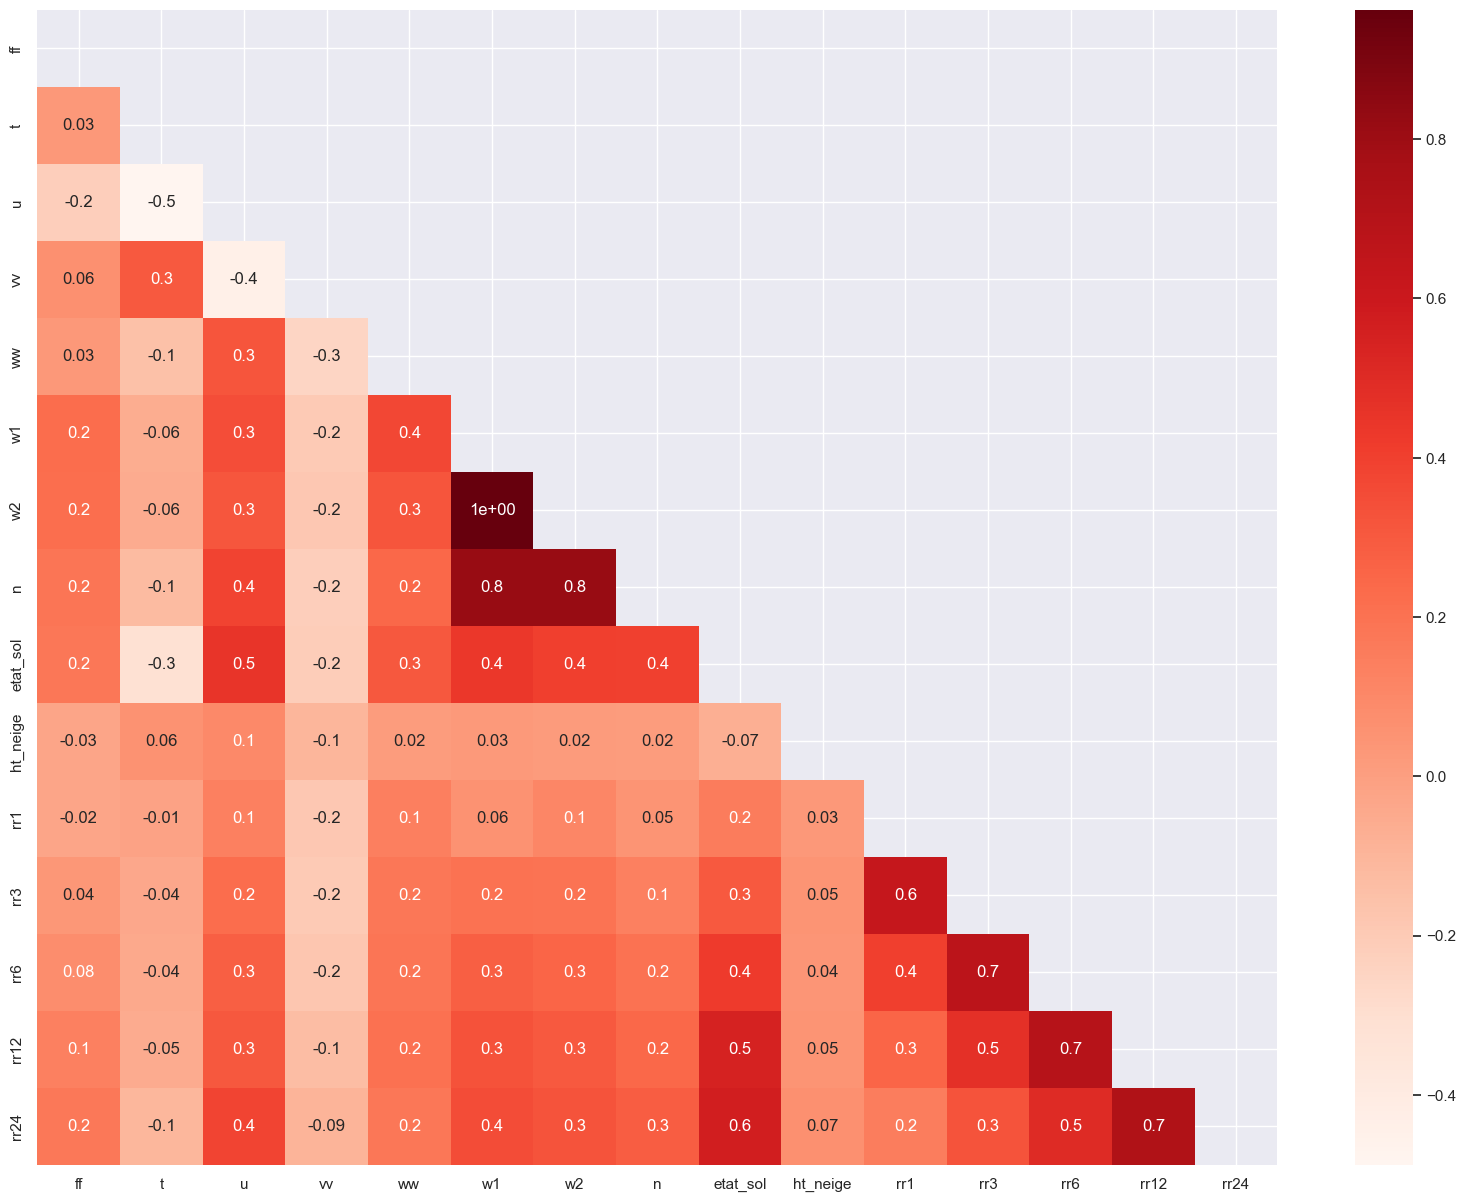

In [36]:
cor_heatmap(cor_spearman)